In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

In [3]:
df = pd.read_csv('../data/clean_data/clean_data.csv')

df.head()

,duration_ms,loudness,tempo,valence,acousticness,danceability,energy
0,0.403695,0.451467,0.178779,0.963,0.732,0.819,0.341
1,0.483304,0.557378,0.412301,0.165,0.967,0.275,0.309
2,0.366304,0.530943,0.421576,0.253,0.957,0.418,0.193
3,0.983312,0.449265,0.529827,0.196,0.579,0.697,0.346
4,0.346890,0.514234,0.210284,0.406,0.996,0.518,0.203


# KMeans algo

In [4]:
from sklearn.cluster import KMeans

In [5]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(k)
    kmeans.fit(df)
    inertias.append(kmeans.inertia_)

len(inertias)

10

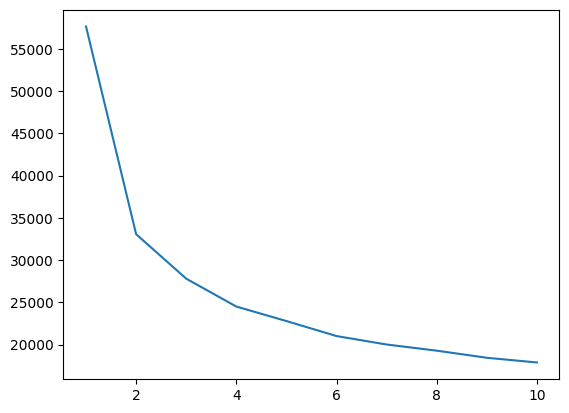

In [6]:
sns.lineplot(x=list(range(1, 11)), y=inertias);

<font color='red'>The optimal number of clusters appears to be 4</font>

## Loop for best KMeans solution

### K-means++ initialization

In [14]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(100):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='k-means++')
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [13]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Total time:     2.91 seconds.
Average time per loop:    0.15 seconds.
Std time per loop:    0.02 seconds.
--------------------------------------------------
Best inertia: 24506.60
Average inertia: 24506.81
Std inertia: 0.10


In [15]:
df_kmeans_pp = df.copy()

df_kmeans_pp['labels'] = best_solution.predict(df_kmeans_pp)

In [16]:
df_kmeans_pp.labels.value_counts(normalize=True)

labels
3    0.272677
2    0.260761
1    0.241513
0    0.225049
Name: proportion, dtype: float64

In [61]:
df_kmeans_pp.to_csv('../data/clustered_data/kmeans_pp_data.csv', index=False)

In [63]:
best_solution.cluster_centers_

array([[0.40056938, 0.46591199, 0.51731626, 0.71024566, 0.79046867,
        0.60288033, 0.38470315],
       [0.50756911, 0.59054749, 0.53641467, 0.77261956, 0.17287056,
        0.66359867, 0.68785755],
       [0.48189789, 0.33995126, 0.43707285, 0.27524772, 0.86001299,
        0.41211561, 0.20664926],
       [0.56921245, 0.61023709, 0.55525329, 0.36677321, 0.12755378,
        0.51232961, 0.6765232 ]])

### Random initialization

In [17]:
best_solution = None
time_partials = []
scores = []

start_total_time = time.time()
for _ in range(100):
    start_partial_time = time.time()
    kmeans = KMeans(4, init='random')
    kmeans.fit(df)
    partial_time = time.time() - start_partial_time
    time_partials.append(partial_time)
    scores.append(kmeans.inertia_)

    if best_solution is None or kmeans.inertia_ < best_solution.inertia_:
        best_solution = kmeans

total_time = time.time() - start_total_time

In [18]:
print(f'Best inertia: {best_solution.inertia_:.2f}')
print(f'Average inertia: {np.mean(scores):.2f}')
print(f'Std inertia: {np.std(scores):.2f}')
print('-'*50)
print(f'Total time:     {total_time:.2f} seconds.')
print(f'Average time per loop:    {np.mean(time_partials):.2f} seconds.')
print(f'Std time per loop:    {np.std(time_partials):.2f} seconds.')

Best inertia: 24506.51
Average inertia: 24506.64
Std inertia: 0.07
--------------------------------------------------
Total time:     31.97 seconds.
Average time per loop:    0.32 seconds.
Std time per loop:    0.07 seconds.


In [19]:
df_kmeans_random = df.copy()

df_kmeans_random['labels'] = best_solution.predict(df_kmeans_random)

In [21]:
df_kmeans_random.labels.value_counts(normalize=True)

labels
2    0.273416
1    0.260303
3    0.242019
0    0.224262
Name: proportion, dtype: float64